<a href="https://colab.research.google.com/github/intel-analytics/BigDL/blob/branch-2.0/python/chronos/colab-notebook/chronos_autots_nyc_taxi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

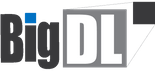

##### Copyright 2016 The BigDL Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
#

## **Environment Preparation**

**Install bigdl-chronos**

You can install the latest pre-release version using `pip install --pre --upgrade bigdl-chronos[all]`. 

In [ ]:
# Install latest pre-release version of bigdl-chronos
# Installing bigdl-chronos from pip will automatically install pyspark, bigdl, and their dependencies.
!pip install --pre --upgrade bigdl-chronos
!pip uninstall -y torchtext # uninstall torchtext to avoid version conflict
exit() # refresh the pkg you just install

## **Unsupervised Anomaly Detection using Chronos Anomaly Detector**

Anomaly detection detects data points in data that does not fit well with the rest of data. In this quickstart we demonstrate how to do anomaly detection for 1-D data using Chronos's Anomaly Detector.

## **Step 0: Prepare dataset**
For demonstration, we use the publicly available real time traffic data from the Twin Cities Metro area in Minnesota, collected by the Minnesota Department of Transportation. Detailed information can be found [here](https://github.com/numenta/NAB/blob/master/data/realTraffic/speed_7578.csv).

In [ ]:
# download the dataset
!wget https://raw.githubusercontent.com/numenta/NAB/master/data/realTraffic/speed_7578.csv

## Step 1: Data Preprocessing
Now we need to do data cleaning and preprocessing on the raw data. Note that this part could vary for different dataset. 

For the machine_usage data, the pre-processing contains 2 parts: <br>
1. Change the time interval from irregular to 5 minutes.<br>
2. Check missing values and handle missing data.

In [ ]:
import pandas as pd
df = pd.read_csv("speed_7578.csv", parse_dates=["timestamp"])
df.head()

In [ ]:
from bigdl.chronos.data import TSDataset

tsdata = TSDataset.from_pandas(df, dt_col="timestamp", target_col="value")
df = tsdata.resample("5min")\
           .impute(mode="linear")\
           .to_pandas()

## Step 2: Use Chronos Anomaly Detector
DBScanDetector uses DBSCAN clustering for anomaly detection. The DBSCAN algorithm tries to cluster the points and label the points that do not belong to any clusters as -1. It thus detects outliers detection in the input time series. DBScanDetector assigns anomaly score 1 to anomaly samples, and 0 to normal samples.

In [ ]:
from bigdl.chronos.detector.anomaly import DBScanDetector

ad = DBScanDetector(eps=0.3, min_samples=6)
ad.fit(df['value'].to_numpy())
anomaly_indexes = ad.anomaly_indexes()

## Step 3: Plot the result
Draw anomalies(red) in line chart.

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,6))
plt.plot(df.timestamp, df.value, label='value')
plt.scatter(df.timestamp[anomaly_indexes],
            df.value[anomaly_indexes],
            color='red', label='anomalies value')

plt.title('the anomalies value')
plt.xlabel('datetime')
plt.legend(loc='upper left')
plt.show()